In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
sns.set()

warnings.filterwarnings('ignore')

%matplotlib inline
color = sns.color_palette()

# Upload data

In [2]:
data = pd.read_csv('data/fixed_data/data.csv')
print(data.shape)
data.head()

(307511, 119)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007.0,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Info

In [3]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 119 columns):
SK_ID_CURR                      float64
TARGET                          float64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    float64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      float64
DAYS_EMPLOYED                   float64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 float64
OWN_CAR_AGE                     float64
FLAG_MOBIL       

# Fast statistical info

In [4]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# Numeric and Categorical data

In [5]:
# К-во уникальных значений во всех категориальных переменных
cols = data.columns
num_cols = data._get_numeric_data().columns
print(num_cols)

# Get categorical
categorical = list(set(cols) - set(num_cols))
print(categorical, len(categorical))

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=103)
['ORGANIZATION_TYPE', 'NAME_EDUCATION_TYPE', 'WALLSMATERIAL_MODE', 'NAME_HOUSING_TYPE', 'NAME_CONTRACT_TYPE', 'EMERGENCYSTATE_MODE', 'NAME_INCOME_TYPE', 'FLAG_OWN_CAR', 'OCCUPATION_TYPE', 'FLAG_OWN_REALTY', 'WEEKDAY_APPR_PROCESS_START', 'NAME_TYPE_SUITE', 'FONDKAPREMONT_MODE', 'NAME_FAMILY_STATUS', 'CODE_GENDER', 'HOUSETYPE_MODE'] 16


# UPLOAD main_test

In [6]:
main_test = pd.read_csv('data/fixed_data/main_test.csv')
print(main_test.shape)
main_test.head()

(48744, 118)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001.0,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005.0,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013.0,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028.0,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038.0,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Append main_test to data

In [7]:
data_and_test = pd.concat([data, main_test]).reset_index(drop=True)

In [8]:
data_and_test.shape

(356255, 119)

In [9]:
# data - [0; 307510]
# main_test - [307511; 356254]

# EXTRACT COMPONENTS FROM OTHER TABLES

# 1) Work with bureau.csv 

### Upload bureau.csv

In [376]:
bureau = pd.read_csv('data/bureau.csv')
print(bureau.shape)
bureau.head()

(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


### Short view of table structure

In [11]:
print(bureau['SK_ID_CURR'].unique().shape)
print((bureau['SK_ID_CURR'] == 215354).sum())
s = np.intersect1d(data_and_test['SK_ID_CURR'].unique(), bureau['SK_ID_CURR'].unique())
s.shape

(305811,)
11


(305811,)

### Transform negative values into positive

In [12]:
bureau['DAYS_CREDIT'] = abs(bureau['DAYS_CREDIT'].values)
bureau['DAYS_CREDIT_ENDDATE'] = abs(bureau['DAYS_CREDIT_ENDDATE'].values)
bureau['DAYS_ENDDATE_FACT'] = abs(bureau['DAYS_ENDDATE_FACT'].values)
bureau['DAYS_CREDIT_UPDATE'] = abs(bureau['DAYS_CREDIT_UPDATE'].values)

### Handle bureau missing values  

In [13]:
missing_values = bureau.isnull().sum().sort_values(ascending=False)
percent_data = (bureau.isnull().sum() / bureau.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_values, percent_data], axis=1, keys=['Total', 'Percent'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print('Missing data:\n', missing_data)

Missing data:
                           Total   Percent
AMT_ANNUITY             1226791  0.714735
AMT_CREDIT_MAX_OVERDUE  1124488  0.655133
DAYS_ENDDATE_FACT        633653  0.369170
AMT_CREDIT_SUM_LIMIT     591780  0.344774
AMT_CREDIT_SUM_DEBT      257669  0.150119
DAYS_CREDIT_ENDDATE      105553  0.061496
AMT_CREDIT_SUM               13  0.000008
CREDIT_TYPE                   0  0.000000
AMT_CREDIT_SUM_OVERDUE        0  0.000000
CNT_CREDIT_PROLONG            0  0.000000
DAYS_CREDIT_UPDATE            0  0.000000
CREDIT_DAY_OVERDUE            0  0.000000
DAYS_CREDIT                   0  0.000000
CREDIT_CURRENCY               0  0.000000
CREDIT_ACTIVE                 0  0.000000
SK_ID_BUREAU                  0  0.000000
SK_ID_CURR                    0  0.000000


In [14]:
bureau_removed = bureau.copy()

# Drop columns
bureau_removed = bureau_removed.drop(columns=['AMT_ANNUITY', 'AMT_CREDIT_MAX_OVERDUE'])

# Fill columns
cols_r =['DAYS_ENDDATE_FACT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_DEBT', 'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_SUM']

for column in cols_r:
    bureau_removed[column] = bureau_removed[column].fillna(bureau_removed[column].mode()[0])

In [15]:
# Check missing values
bureau_removed.isnull().sum().values.sum()

0

### One hot encoding

In [16]:
bureau_removed_dum = pd.get_dummies(bureau_removed)
bureau_removed_dum.shape

(1716428, 35)

### Perform normalization

In [17]:
scaler = MinMaxScaler()
bureau_removed_norm = pd.DataFrame(scaler.fit_transform(bureau_removed_dum), 
                                   columns=bureau_removed_dum.columns)
bureau_removed_norm.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,0.323794,0.387566,0.170089,0.0,0.003638,0.003641,0.0,0.000156,0.026919,0.11081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.323794,0.387567,0.071184,0.0,0.025559,0.007829,0.0,0.000385,0.027899,0.11081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.323794,0.387567,0.069473,0.0,0.012553,0.007829,0.0,0.000794,0.026919,0.11081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.323794,0.387568,0.069473,0.0,0.000024,0.007829,0.0,0.000154,0.026919,0.11081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.323794,0.387569,0.215264,0.0,0.028459,0.007829,0.0,0.004615,0.026919,0.11081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Finding indexes, columns, combining together and so on

In [18]:
# Relief id`s
bureau_features = bureau_removed_norm.copy()
del bureau_features['SK_ID_CURR']
del bureau_features['SK_ID_BUREAU']
bureau_features.shape

(1716428, 33)

### Perform Decomposition

In [19]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1, n_iter=7)
bureau_component = svd.fit_transform(bureau_features)  
bureau_component.shape

(1716428, 1)

In [20]:
bureau_component = pd.DataFrame(bureau_component, columns=['COMPONENT'])
bureau_component['SK_ID_CURR'] = bureau_removed_dum['SK_ID_CURR'].values
bureau_component['SK_ID_BUREAU'] = bureau_removed_dum['SK_ID_BUREAU'].values
print(bureau_component.shape)
bureau_component.head()

(1716428, 3)


,COMPONENT,SK_ID_CURR,SK_ID_BUREAU
0,1.655994,215354,5714462
1,0.967804,215354,5714463
2,1.368491,215354,5714464
3,0.966734,215354,5714465
4,1.407849,215354,5714466


In [21]:
bureau_component = bureau_component.set_index('SK_ID_BUREAU')
bureau_component.head(10)

,COMPONENT,SK_ID_CURR
SK_ID_BUREAU,,
5714462,1.655994,215354
5714463,0.967804,215354
5714464,1.368491,215354
5714465,0.966734,215354
5714466,1.407849,215354
5714467,0.989828,215354
5714468,1.353605,215354
5714469,1.785726,162297
5714470,1.716132,162297


### Calculate value for each row

In [22]:
bureau_comp = bureau_component.groupby('SK_ID_CURR', as_index=False)['COMPONENT'].median().rename(columns = {'COMPONENT': 'BUREAU_COMPONENT'})
bureau_comp.head()

,SK_ID_CURR,BUREAU_COMPONENT
0,100001,1.689255
1,100002,1.379206
2,100003,1.520511
3,100004,1.690253
4,100005,1.355368


### Merge data.csv and BUREAU_COMPONENT

In [27]:
# Join to the training dataframe
data_combined = data_and_test.merge(bureau_comp, on = 'SK_ID_CURR', how = 'left')
data_combined.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,TOTALAREA_MODE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,BUREAU_COMPONENT
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0149,"Stone, brick",WEDNESDAY,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341,1.379206
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0714,Block,MONDAY,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040,1.520511
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,MONDAY,NaN,NaN,NaN,NaN,NaN,NaN,1.690253
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,WEDNESDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,THURSDAY,NaN,NaN,NaN,NaN,NaN,NaN,1.716360


# 2) Work with installments_payments.csv 

### Upload installments_payments.csv

In [384]:
installments_payments = pd.read_csv('data/installments_payments.csv')
print(installments_payments.shape)
installments_payments.head()

(13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


### Short view of table structure

In [29]:
print(installments_payments['SK_ID_CURR'].unique().shape)
print((installments_payments['SK_ID_CURR'] == 215354).sum())
s = np.intersect1d(data_and_test['SK_ID_CURR'].unique(), installments_payments['SK_ID_CURR'].unique())
s.shape

(339587,)
113


(339587,)

### Transform negative values into positive

In [30]:
installments_payments['DAYS_INSTALMENT'] = abs(installments_payments ['DAYS_INSTALMENT'].values)
installments_payments['DAYS_ENTRY_PAYMENT'] = abs(installments_payments ['DAYS_ENTRY_PAYMENT'].values)

### Handle installments_payments missing values

In [31]:
missing_values = installments_payments.isnull().sum().sort_values(ascending=False)
percent_data = (installments_payments.isnull().sum() / installments_payments.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_values, percent_data], axis=1, keys=['Total', 'Percent'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print('Missing data:\n', missing_data)

Missing data:
                         Total   Percent
AMT_PAYMENT              2905  0.000214
DAYS_ENTRY_PAYMENT       2905  0.000214
AMT_INSTALMENT              0  0.000000
DAYS_INSTALMENT             0  0.000000
NUM_INSTALMENT_NUMBER       0  0.000000
NUM_INSTALMENT_VERSION      0  0.000000
SK_ID_CURR                  0  0.000000
SK_ID_PREV                  0  0.000000


In [32]:
installments_payments_removed = installments_payments.copy()

# Fill columns
cols_r =['AMT_PAYMENT', 'DAYS_ENTRY_PAYMENT']

for column in cols_r:
    installments_payments_removed[column] = installments_payments_removed[column].fillna(
                                            installments_payments_removed[column].median())

In [33]:
# Check missing values
installments_payments_removed.isnull().sum().values.sum()

0

### One hot encoding

In [34]:
installments_payments_dum = pd.get_dummies(installments_payments_removed)
installments_payments_dum.shape

(13605401, 8)

### Perform normalization

In [35]:
scaler = MinMaxScaler()
installments_payments_norm = pd.DataFrame(scaler.fit_transform(installments_payments_dum), 
                                          columns=installments_payments_dum.columns)
installments_payments_norm.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,0.029392,0.173115,0.005618,0.018116,0.403629,0.241057,0.001842,0.001842
1,0.179458,0.144947,0.000000,0.119565,0.737761,0.438008,0.000455,0.000455
2,0.588680,0.261196,0.011236,0.000000,0.021226,0.012602,0.006741,0.006741
3,0.787918,0.279845,0.005618,0.007246,0.827456,0.492886,0.006456,0.006456
4,0.930146,0.190187,0.005618,0.003623,0.473126,0.277439,0.000574,0.000573


### Finding indexes, columns, combining together and so on

In [36]:
# Relief id`s
installments_payments_features = installments_payments_norm.copy()
del installments_payments_features['SK_ID_CURR']
del installments_payments_features['SK_ID_PREV']
installments_payments_features.shape

(13605401, 6)

### Perform Decomposition

In [37]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1, n_iter=7)
installments_payments_component = svd.fit_transform(installments_payments_features)  
installments_payments_component.shape

(13605401, 1)

In [38]:
installments_payments_component = pd.DataFrame(installments_payments_component, columns=['COMPONENT'])
installments_payments_component['SK_ID_CURR'] = installments_payments_dum['SK_ID_CURR'].values
installments_payments_component['SK_ID_PREV'] = installments_payments_dum['SK_ID_PREV'].values
print(installments_payments_component.shape)
installments_payments_component.head()

(13605401, 3)


,COMPONENT,SK_ID_CURR,SK_ID_PREV
0,0.469858,161674,1054186
1,0.865282,151639,1330831
2,0.024717,193053,2085231
3,0.959831,199697,2452527
4,0.546516,167756,2714724


In [39]:
installments_payments_component = installments_payments_component.set_index('SK_ID_PREV')
installments_payments_component.head(10)

,COMPONENT,SK_ID_CURR
SK_ID_PREV,,
1054186,0.469858,161674
1330831,0.865282,151639
2085231,0.024717,193053
2452527,0.959831,199697
2714724,0.546516,167756
1137312,0.555413,164489
2234264,0.141803,184693
1818599,0.387182,111420
2723183,0.082003,112102


### Calculate value for each row

In [40]:
installments_payments_comp = installments_payments_component.groupby('SK_ID_CURR', as_index=False)['COMPONENT'].median().rename(columns = {'COMPONENT': 'installments_payments_COMPONENT'})
installments_payments_comp.head()

,SK_ID_CURR,installments_payments_COMPONENT
0,100001,0.677821
1,100002,0.121356
2,100003,0.316717
3,100004,0.299847
4,100005,0.233195


### Merge with data_combined

In [41]:
# Join to the training dataframe
data_combined = data_combined.merge(installments_payments_comp, on = 'SK_ID_CURR', how = 'left')
data_combined.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,BUREAU_COMPONENT,installments_payments_COMPONENT
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"Stone, brick",WEDNESDAY,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341,1.379206,0.121356
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Block,MONDAY,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040,1.520511,0.316717
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,MONDAY,NaN,NaN,NaN,NaN,NaN,NaN,1.690253,0.299847
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,WEDNESDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082729
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,THURSDAY,NaN,NaN,NaN,NaN,NaN,NaN,1.716360,0.339719


# 3) Work with POS_CASH_balance.csv

### Upload POS_CASH_balance.csv

In [385]:
POS_CASH_balance = pd.read_csv('data/POS_CASH_balance.csv')
print(POS_CASH_balance.shape)
POS_CASH_balance.head()

(10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


### Short view of table structure

In [43]:
print(POS_CASH_balance['SK_ID_CURR'].unique().shape)
print((POS_CASH_balance['SK_ID_CURR'] == 215354).sum())
s = np.intersect1d(data_and_test['SK_ID_CURR'].unique(), POS_CASH_balance['SK_ID_CURR'].unique())
s.shape

(337252,)
53


(337252,)

### Transform negative values into positive

In [44]:
POS_CASH_balance['MONTHS_BALANCE'] = abs(POS_CASH_balance ['MONTHS_BALANCE'].values)

### Handle POS_CASH_balance missing values

In [45]:
missing_values = POS_CASH_balance.isnull().sum().sort_values(ascending=False)
percent_data = (POS_CASH_balance.isnull().sum() / POS_CASH_balance.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_values, percent_data], axis=1, keys=['Total', 'Percent'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print('Missing data:\n', missing_data)

Missing data:
                        Total   Percent
CNT_INSTALMENT_FUTURE  26087  0.002608
CNT_INSTALMENT         26071  0.002607
SK_DPD_DEF                 0  0.000000
SK_DPD                     0  0.000000
NAME_CONTRACT_STATUS       0  0.000000
MONTHS_BALANCE             0  0.000000
SK_ID_CURR                 0  0.000000
SK_ID_PREV                 0  0.000000


In [46]:
POS_CASH_balance_removed = POS_CASH_balance.copy()

# Fill columns
cols_r =['CNT_INSTALMENT_FUTURE', 'CNT_INSTALMENT']

for column in cols_r:
    POS_CASH_balance_removed[column] = POS_CASH_balance_removed[column].fillna(
                                            POS_CASH_balance_removed[column].median())

In [47]:
# Check missing values
POS_CASH_balance_removed.isnull().sum().values.sum()

0

### One hot encoding

In [48]:
POS_CASH_balance_dum = pd.get_dummies(POS_CASH_balance_removed)
POS_CASH_balance_dum.shape

(10001358, 16)

### Perform normalization

In [49]:
scaler = MinMaxScaler()
POS_CASH_balance_norm = pd.DataFrame(scaler.fit_transform(POS_CASH_balance_dum), 
                                          columns=POS_CASH_balance_dum.columns)
POS_CASH_balance_norm.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA
0,0.435690,0.232817,0.315789,0.516484,0.529412,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.388038,0.752241,0.336842,0.384615,0.411765,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.425751,0.834812,0.326316,0.120879,0.105882,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.489987,0.475009,0.357895,0.516484,0.494118,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.727445,0.657615,0.357895,0.384615,0.411765,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Finding indexes, columns, combining together and so on

In [50]:
# Relief id`s
POS_CASH_balance_features = POS_CASH_balance_norm.copy()
del POS_CASH_balance_features['SK_ID_CURR']
del POS_CASH_balance_features['SK_ID_PREV']
POS_CASH_balance_features.shape

(10001358, 14)

### Perform Decomposition

In [51]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1, n_iter=7)
POS_CASH_balance_component = svd.fit_transform(POS_CASH_balance_features)  
POS_CASH_balance_component.shape

(10001358, 1)

In [52]:
POS_CASH_balance_component = pd.DataFrame(POS_CASH_balance_component, columns=['COMPONENT'])
POS_CASH_balance_component['SK_ID_CURR'] = POS_CASH_balance_dum['SK_ID_CURR'].values
POS_CASH_balance_component['SK_ID_PREV'] = POS_CASH_balance_dum['SK_ID_PREV'].values
print(POS_CASH_balance_component.shape)
POS_CASH_balance_component.head()

(10001358, 3)


,COMPONENT,SK_ID_CURR,SK_ID_PREV
0,1.175615,182943,1803195
1,1.146337,367990,1715348
2,1.060544,397406,1784872
3,1.186172,269225,1903291
4,1.153776,334279,2341044


In [53]:
POS_CASH_balance_component = POS_CASH_balance_component.set_index('SK_ID_PREV')
POS_CASH_balance_component.head(10)

,COMPONENT,SK_ID_CURR
SK_ID_PREV,,
1803195,1.175615,182943
1715348,1.146337,367990
1784872,1.060544,397406
1903291,1.186172,269225
2341044,1.153776,334279
2207092,1.064864,342166
1110516,1.198770,204376
1387235,1.155216,153211
1220500,1.061145,112740


### Calculate value for each row

In [54]:
POS_CASH_balance_comp = POS_CASH_balance_component.groupby('SK_ID_CURR', as_index=False)['COMPONENT'].median().rename(columns = {'COMPONENT': 'POS_CASH_balance_COMPONENT'})
POS_CASH_balance_comp.head()

,SK_ID_CURR,POS_CASH_balance_COMPONENT
0,100001,1.126294
1,100002,1.009671
2,100003,1.031928
3,100004,1.012130
4,100005,1.009310


### Merge data_combined.csv and POS_CASH_balance_COMPONENT

In [55]:
data_combined = data_combined.merge(POS_CASH_balance_comp, on=['SK_ID_CURR'], how='left')
print(data_combined.shape)
data_combined.head()

(356255, 122)


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,BUREAU_COMPONENT,installments_payments_COMPONENT,POS_CASH_balance_COMPONENT
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,WEDNESDAY,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341,1.379206,0.121356,1.009671
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,MONDAY,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040,1.520511,0.316717,1.031928
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,MONDAY,NaN,NaN,NaN,NaN,NaN,NaN,1.690253,0.299847,1.012130
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,WEDNESDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082729,0.967557
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,THURSDAY,NaN,NaN,NaN,NaN,NaN,NaN,1.716360,0.339719,1.046385


# 4) Work with previous_application.csv

### Upload previous_application.csv

In [386]:
previous_application = pd.read_csv('data/previous_application.csv')
print(previous_application.shape)
previous_application.head()

(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Short view of table structure

In [57]:
print(previous_application['SK_ID_CURR'].unique().shape)
print((previous_application['SK_ID_CURR'] == 215354).sum())
s = np.intersect1d(data_and_test['SK_ID_CURR'].unique(), previous_application['SK_ID_CURR'].unique())
s.shape

(338857,)
5


(338857,)

### Transform negative values into positive

In [58]:
previous_application['DAYS_FIRST_DUE'] = abs(previous_application ['DAYS_FIRST_DUE'].values)
previous_application['DAYS_LAST_DUE_1ST_VERSION'] = abs(previous_application ['DAYS_LAST_DUE_1ST_VERSION'].values)
previous_application['DAYS_FIRST_DRAWING'] = abs(previous_application ['DAYS_FIRST_DRAWING'].values)
previous_application['DAYS_LAST_DUE'] = abs(previous_application ['DAYS_LAST_DUE'].values)
previous_application['DAYS_TERMINATION'] = abs(previous_application ['DAYS_TERMINATION'].values)

### Handle previous_application missing values

In [59]:
missing_values = previous_application.isnull().sum().sort_values(ascending=False)
percent_data = (previous_application.isnull().sum() / previous_application.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_values, percent_data], axis=1, keys=['Total', 'Percent'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print('Missing data:\n', missing_data)

Missing data:
                                Total       Percent
RATE_INTEREST_PRIVILEGED     1664263  9.964370e-01
RATE_INTEREST_PRIMARY        1664263  9.964370e-01
RATE_DOWN_PAYMENT             895844  5.363648e-01
AMT_DOWN_PAYMENT              895844  5.363648e-01
NAME_TYPE_SUITE               820405  4.911975e-01
DAYS_TERMINATION              673065  4.029813e-01
NFLAG_INSURED_ON_APPROVAL     673065  4.029813e-01
DAYS_FIRST_DRAWING            673065  4.029813e-01
DAYS_FIRST_DUE                673065  4.029813e-01
DAYS_LAST_DUE_1ST_VERSION     673065  4.029813e-01
DAYS_LAST_DUE                 673065  4.029813e-01
AMT_GOODS_PRICE               385515  2.308177e-01
AMT_ANNUITY                   372235  2.228667e-01
CNT_PAYMENT                   372230  2.228637e-01
PRODUCT_COMBINATION              346  2.071591e-04
AMT_CREDIT                         1  5.987257e-07
SK_ID_CURR                         0  0.000000e+00
NAME_CONTRACT_TYPE                 0  0.000000e+00
WEEKDAY_APPR_PRO

In [60]:
previous_application = previous_application.drop(columns=['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY'])

In [61]:
previous_application_removed = previous_application.copy()

# Fill columns
cols_r =['RATE_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT', 'DAYS_TERMINATION',
        'NFLAG_INSURED_ON_APPROVAL', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
        'DAYS_LAST_DUE', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT',
        'AMT_CREDIT']

cols_s = ['NAME_TYPE_SUITE', 'PRODUCT_COMBINATION', ]

for column in cols_r:
    previous_application_removed[column] = previous_application_removed[column].fillna(
                                           previous_application_removed[column].median())
    
for column in cols_s:
    previous_application_removed[column] = previous_application_removed[column].fillna(
                                           previous_application_removed[column].mode()[0])

In [62]:
# Check missing values
previous_application_removed.isnull().sum().values.sum()

0

### One hot encoding

In [63]:
previous_application_dum = pd.get_dummies(previous_application_removed)
previous_application_dum.shape

(1670214, 162)

### Perform normalization

In [64]:
scaler = MinMaxScaler()
previous_application_norm = pd.DataFrame(scaler.fit_transform(previous_application_dum), 
                                          columns=previous_application_dum.columns)
previous_application_norm.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,0.558418,0.482454,0.004139,0.002483,0.002483,2.941132e-07,0.002483,0.652174,1.0,0.000015,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.976722,0.022815,0.060251,0.087978,0.098429,5.355802e-04,0.087978,0.478261,1.0,0.051619,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.825556,0.061863,0.036025,0.016292,0.019760,5.355802e-04,0.016292,0.478261,1.0,0.051619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.985835,0.213772,0.112523,0.065169,0.068179,5.355802e-04,0.065169,0.304348,1.0,0.051619,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.424988,0.286461,0.076364,0.048876,0.058515,5.355802e-04,0.048876,0.391304,1.0,0.051619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Finding indexes, columns, combining together and so on

In [65]:
# Relief id`s
previous_application_features = previous_application_norm.copy()
del previous_application_features['SK_ID_CURR']
del previous_application_features['SK_ID_PREV']
previous_application_features.shape

(1670214, 160)

### Perform Decomposition

In [66]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1, n_iter=7)
previous_application_component = svd.fit_transform(previous_application_features)  
previous_application_component.shape

(1670214, 1)

In [67]:
previous_application_component = pd.DataFrame(previous_application_component, columns=['COMPONENT'])
previous_application_component['SK_ID_CURR'] = previous_application_dum['SK_ID_CURR'].values
previous_application_component['SK_ID_PREV'] = previous_application_dum['SK_ID_PREV'].values
print(previous_application_component.shape)
previous_application_component.head()

(1670214, 3)


,COMPONENT,SK_ID_CURR,SK_ID_PREV
0,3.391711,271877,2030495
1,3.409357,108129,2802425
2,3.374997,122040,2523466
3,3.514514,176158,2819243
4,2.849503,202054,1784265


In [68]:
previous_application_component = previous_application_component.set_index('SK_ID_PREV')
previous_application_component.head(10)

,COMPONENT,SK_ID_CURR
SK_ID_PREV,,
2030495,3.391711,271877
2802425,3.409357,108129
2523466,3.374997,122040
2819243,3.514514,176158
1784265,2.849503,202054
1383531,3.136376,199383
2315218,3.459066,175704
1656711,3.428420,296299
2367563,3.460101,342292


### Calculate value for each row

In [69]:
previous_application_comp = POS_CASH_balance_component.groupby('SK_ID_CURR', as_index=False)['COMPONENT'].median().rename(columns = {'COMPONENT': 'previous_application_COMPONENT'})
previous_application_comp.head()

,SK_ID_CURR,previous_application_COMPONENT
0,100001,1.126294
1,100002,1.009671
2,100003,1.031928
3,100004,1.012130
4,100005,1.009310


### Merge data_combined.csv and previous_application_COMPONENT

In [70]:
data_combined = data_combined.merge(previous_application_comp, on=['SK_ID_CURR'], how='left')
print(data_combined.shape)
data_combined.head()

(356255, 123)


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,BUREAU_COMPONENT,installments_payments_COMPONENT,POS_CASH_balance_COMPONENT,previous_application_COMPONENT
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341,1.379206,0.121356,1.009671,1.009671
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040,1.520511,0.316717,1.031928,1.031928
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.690253,0.299847,1.012130,1.012130
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082729,0.967557,0.967557
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.716360,0.339719,1.046385,1.046385


# Save checkpoint

In [71]:
data_combined.to_csv('data/pre_preprocessed_data/data_combined_components.csv')

# Add to data_combined features from minor tables

# 1) bureau.csv

### 1.1) prev_loan_sum

In [72]:
prev_loan_sum = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'prev_loan_sum'})
prev_loan_sum.head()

,SK_ID_CURR,prev_loan_sum
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [73]:
# Join to the training dataframe
data_combined = data_combined.merge(prev_loan_sum, on = 'SK_ID_CURR', how = 'left')

# Fill the missing values with 0 
data_combined['prev_loan_sum'] = data_combined['prev_loan_sum'].fillna(0)
data_combined.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,BUREAU_COMPONENT,installments_payments_COMPONENT,POS_CASH_balance_COMPONENT,previous_application_COMPONENT,prev_loan_sum
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.9722,0.9722,0.6192,0.6243,0.6341,1.379206,0.121356,1.009671,1.009671,8.0
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9851,0.9851,0.7960,0.7987,0.8040,1.520511,0.316717,1.031928,1.031928,4.0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.690253,0.299847,1.012130,1.012130,2.0
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.082729,0.967557,0.967557,0.0
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.716360,0.339719,1.046385,1.046385,1.0


### 1.2) credit_prolong

In [74]:
credit_prolong = bureau.groupby('SK_ID_CURR', as_index=False)['CNT_CREDIT_PROLONG'].sum().rename(columns = {'CNT_CREDIT_PROLONG': 'credit_prolong'})
credit_prolong.head()

,SK_ID_CURR,credit_prolong
0,100001,0
1,100002,0
2,100003,0
3,100004,0
4,100005,0


In [75]:
# Join to the training dataframe
data_combined = data_combined.merge(credit_prolong, on = 'SK_ID_CURR', how = 'left')

# Fill the missing values with 0 
data_combined['credit_prolong'] = data_combined['credit_prolong'].fillna(0)
data_combined.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,BUREAU_COMPONENT,installments_payments_COMPONENT,POS_CASH_balance_COMPONENT,previous_application_COMPONENT,prev_loan_sum,credit_prolong
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.9722,0.6192,0.6243,0.6341,1.379206,0.121356,1.009671,1.009671,8.0,0.0
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9851,0.7960,0.7987,0.8040,1.520511,0.316717,1.031928,1.031928,4.0,0.0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1.690253,0.299847,1.012130,1.012130,2.0,0.0
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.082729,0.967557,0.967557,0.0,0.0
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1.716360,0.339719,1.046385,1.046385,1.0,0.0


### 1.3) credit_update_days

In [76]:
credit_update_days = bureau.groupby('SK_ID_CURR', as_index=False)['DAYS_CREDIT_UPDATE'].sum().rename(columns = {'DAYS_CREDIT_UPDATE': 'credit_update_days'})
credit_update_days.head()

,SK_ID_CURR,credit_update_days
0,100001,652
1,100002,3999
2,100003,3264
3,100004,1064
4,100005,163


In [77]:
# Join to the training dataframe
data_combined = data_combined.merge(credit_update_days, on = 'SK_ID_CURR', how = 'left')

# Fill the missing values with 0 
data_combined['credit_update_days'] = data_combined['credit_update_days'].fillna(0)
data_combined.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,BUREAU_COMPONENT,installments_payments_COMPONENT,POS_CASH_balance_COMPONENT,previous_application_COMPONENT,prev_loan_sum,credit_prolong,credit_update_days
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.6192,0.6243,0.6341,1.379206,0.121356,1.009671,1.009671,8.0,0.0,3999.0
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.7960,0.7987,0.8040,1.520511,0.316717,1.031928,1.031928,4.0,0.0,3264.0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.690253,0.299847,1.012130,1.012130,2.0,0.0,1064.0
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.082729,0.967557,0.967557,0.0,0.0,0.0
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.716360,0.339719,1.046385,1.046385,1.0,0.0,783.0


### 1.4) AMT_CREDIT_SUM_DEBT

In [78]:
amt_credit_sum_debt = bureau.groupby('SK_ID_CURR', as_index=False)['AMT_CREDIT_SUM_DEBT'].sum().rename(columns = {'AMT_CREDIT_SUM_DEBT': 'amt_credit_sum_debt'})
amt_credit_sum_debt.head()

,SK_ID_CURR,amt_credit_sum_debt
0,100001,596686.5
1,100002,245781.0
2,100003,0.0
3,100004,0.0
4,100005,568408.5


In [79]:
# Join to the training dataframe
data_combined = data_combined.merge(amt_credit_sum_debt, on = 'SK_ID_CURR', how = 'left')

# Fill the missing values with 0 
data_combined['amt_credit_sum_debt'] = data_combined['amt_credit_sum_debt'].fillna(0)
data_combined.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,BUREAU_COMPONENT,installments_payments_COMPONENT,POS_CASH_balance_COMPONENT,previous_application_COMPONENT,prev_loan_sum,credit_prolong,credit_update_days,amt_credit_sum_debt
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.6243,0.6341,1.379206,0.121356,1.009671,1.009671,8.0,0.0,3999.0,245781.0
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.7987,0.8040,1.520511,0.316717,1.031928,1.031928,4.0,0.0,3264.0,0.0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,1.690253,0.299847,1.012130,1.012130,2.0,0.0,1064.0,0.0
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.082729,0.967557,0.967557,0.0,0.0,0.0,0.0
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,1.716360,0.339719,1.046385,1.046385,1.0,0.0,783.0,0.0


# 2) installments_payments.csv

In [80]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,1180.0,1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,2156.0,2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,63.0,63.0,25425.000,25425.000
3,2452527,199697,1.0,3,2418.0,2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,1383.0,1366.0,2165.040,2160.585


### 1.1) count_prev_sk

In [81]:
count_prev_sk = installments_payments.groupby('SK_ID_CURR', as_index=False)['SK_ID_PREV'].count().rename(columns = {'SK_ID_PREV': 'count_prev_sk'})
count_prev_sk.head()

,SK_ID_CURR,count_prev_sk
0,100001,7
1,100002,19
2,100003,25
3,100004,3
4,100005,9


In [82]:
# Join to the training dataframe
data_combined = data_combined.merge(count_prev_sk, on = 'SK_ID_CURR', how = 'left')

# Fill the missing values with 0 
data_combined['count_prev_sk'] = data_combined['count_prev_sk'].fillna(0)
data_combined.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,YEARS_BUILD_MODE,BUREAU_COMPONENT,installments_payments_COMPONENT,POS_CASH_balance_COMPONENT,previous_application_COMPONENT,prev_loan_sum,credit_prolong,credit_update_days,amt_credit_sum_debt,count_prev_sk
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.6341,1.379206,0.121356,1.009671,1.009671,8.0,0.0,3999.0,245781.0,19.0
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8040,1.520511,0.316717,1.031928,1.031928,4.0,0.0,3264.0,0.0,25.0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1.690253,0.299847,1.012130,1.012130,2.0,0.0,1064.0,0.0,3.0
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.082729,0.967557,0.967557,0.0,0.0,0.0,0.0,16.0
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1.716360,0.339719,1.046385,1.046385,1.0,0.0,783.0,0.0,66.0


### 1.2) payment_diff

In [83]:
installments_payments['PAYMENT_DIFF'] = abs(installments_payments['DAYS_ENTRY_PAYMENT']) - abs(installments_payments['DAYS_INSTALMENT'])
payment_diff = installments_payments.groupby('SK_ID_CURR', as_index=False)['PAYMENT_DIFF'].sum().rename(columns = {'PAYMENT_DIFF': 'payment_diff'})

payment_diff.head()

,SK_ID_CURR,payment_diff
0,100001,51.0
1,100002,388.0
2,100003,179.0
3,100004,23.0
4,100005,212.0


In [84]:
# Join to the training dataframe
data_combined = data_combined.merge(payment_diff, on = 'SK_ID_CURR', how = 'left')

# Fill the missing values with 0 
data_combined['payment_diff'] = data_combined['payment_diff'].fillna(0)
data_combined.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,BUREAU_COMPONENT,installments_payments_COMPONENT,POS_CASH_balance_COMPONENT,previous_application_COMPONENT,prev_loan_sum,credit_prolong,credit_update_days,amt_credit_sum_debt,count_prev_sk,payment_diff
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.379206,0.121356,1.009671,1.009671,8.0,0.0,3999.0,245781.0,19.0,388.0
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.520511,0.316717,1.031928,1.031928,4.0,0.0,3264.0,0.0,25.0,179.0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.690253,0.299847,1.012130,1.012130,2.0,0.0,1064.0,0.0,3.0,23.0
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.082729,0.967557,0.967557,0.0,0.0,0.0,0.0,16.0,310.0
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.716360,0.339719,1.046385,1.046385,1.0,0.0,783.0,0.0,66.0,240.0


### 1.3) paid_diff

In [85]:
installments_payments['PAID_DIFF'] = abs(installments_payments['AMT_PAYMENT']) - abs(installments_payments['AMT_INSTALMENT'])
paid_diff = installments_payments.groupby('SK_ID_CURR', as_index=False)['PAID_DIFF'].sum().rename(columns = {'PAID_DIFF': 'paid_diff'})

paid_diff.head()

,SK_ID_CURR,paid_diff
0,100001,0.0
1,100002,0.0
2,100003,0.0
3,100004,0.0
4,100005,0.0


In [86]:
# Join to the training dataframe
data_combined = data_combined.merge(paid_diff, on = 'SK_ID_CURR', how = 'left')

# Fill the missing values with 0 
data_combined['paid_diff'] = data_combined['paid_diff'].fillna(0)
data_combined.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,installments_payments_COMPONENT,POS_CASH_balance_COMPONENT,previous_application_COMPONENT,prev_loan_sum,credit_prolong,credit_update_days,amt_credit_sum_debt,count_prev_sk,payment_diff,paid_diff
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.121356,1.009671,1.009671,8.0,0.0,3999.0,245781.0,19.0,388.0,0.000
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.316717,1.031928,1.031928,4.0,0.0,3264.0,0.0,25.0,179.0,0.000
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.299847,1.012130,1.012130,2.0,0.0,1064.0,0.0,3.0,23.0,0.000
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.082729,0.967557,0.967557,0.0,0.0,0.0,0.0,16.0,310.0,0.000
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.339719,1.046385,1.046385,1.0,0.0,783.0,0.0,66.0,240.0,-29857.365


# Save checkpoint (+ features)

In [20]:
data_combined.to_csv('data/pre_preprocessed_data/data_combined_components_features.csv', index=False)

# Load checkpoint (+ features)

In [21]:
data_combined = pd.read_csv('data/pre_preprocessed_data/data_combined_components_features.csv')

# Add total features from minor tables

## 1) Bureau_balance

In [375]:
bureau_balance = pd.read_csv('data/bureau_balance.csv')
print(bureau_balance.shape)
bureau_balance.head()

(27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [381]:
bureau_balance_grouped_size = bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].size()
bureau_balance_grouped_max = bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].max()
bureau_balance_grouped_min = bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].min()

bureau_balance_counts = bureau_balance.groupby('SK_ID_BUREAU')['STATUS'].value_counts(normalize=False)
bureau_balance_counts_unstacked = bureau_balance_counts.unstack('STATUS')
bureau_balance_counts_unstacked.columns = ['STATUS_0', 'STATUS_1','STATUS_2','STATUS_3','STATUS_4','STATUS_5','STATUS_C','STATUS_X',]
bureau_balance_counts_unstacked['MONTHS_COUNT'] = bureau_balance_grouped_size
bureau_balance_counts_unstacked['MONTHS_MIN'] = bureau_balance_grouped_min
bureau_balance_counts_unstacked['MONTHS_MAX'] = bureau_balance_grouped_max

bureau_merged = bureau.join(bureau_balance_counts_unstacked, how='left', on='SK_ID_BUREAU')

In [382]:
bureau_merged.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,MONTHS_COUNT,MONTHS_MIN,MONTHS_MAX
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [388]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
#Pre-processing previous_application
print('Pre-processing previous_application...')
#One-hot encoding of categorical features in previous application data set
prev_cat_features = [pcol for pcol in previous_application.columns if previous_application[pcol].dtype == 'object']
prev = pd.get_dummies(previous_application, columns=prev_cat_features)
avg_prev = prev.groupby('SK_ID_CURR').mean()
cnt_prev = prev[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
avg_prev['nb_app'] = cnt_prev['SK_ID_PREV']
del avg_prev['SK_ID_PREV']

#Pre-processing buro
print('Pre-processing buro...')
#One-hot encoding of categorical features in buro data set
buro_cat_features = [bcol for bcol in bureau.columns if bureau[bcol].dtype == 'object']
buro = pd.get_dummies(bureau, columns=buro_cat_features)
avg_buro = buro.groupby('SK_ID_CURR').mean()
avg_buro['buro_count'] = buro[['SK_ID_BUREAU', 'SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_BUREAU']
del avg_buro['SK_ID_BUREAU']

#Pre-processing POS_CASH
print('Pre-processing POS_CASH...')
le = LabelEncoder()
POS_CASH_balance['NAME_CONTRACT_STATUS'] = le.fit_transform(POS_CASH_balance['NAME_CONTRACT_STATUS'].astype(str))
nunique_status = POS_CASH_balance[['SK_ID_CURR', 'NAME_CONTRACT_STATUS']].groupby('SK_ID_CURR').nunique()
nunique_status2 = POS_CASH_balance[['SK_ID_CURR', 'NAME_CONTRACT_STATUS']].groupby('SK_ID_CURR').max()
POS_CASH_balance['NUNIQUE_STATUS'] = nunique_status['NAME_CONTRACT_STATUS']
POS_CASH_balance['NUNIQUE_STATUS2'] = nunique_status2['NAME_CONTRACT_STATUS']
POS_CASH_balance.drop(['SK_ID_PREV', 'NAME_CONTRACT_STATUS'], axis=1, inplace=True)

#Pre-processing payments
print('Pre-processing payments...')
avg_payments = installments_payments.groupby('SK_ID_CURR').mean()
avg_payments2 = installments_payments.groupby('SK_ID_CURR').max()
avg_payments3 = installments_payments.groupby('SK_ID_CURR').min()
del avg_payments['SK_ID_PREV']



Pre-processing previous_application...
Pre-processing buro...
Pre-processing POS_CASH...
Pre-processing payments...


In [389]:
data = data_combined.copy()

In [391]:
#Join data bases
print('Joining databases...')
data = data.merge(right=avg_prev.reset_index(), how='left', on='SK_ID_CURR')
data = data.merge(right=avg_buro.reset_index(), how='left', on='SK_ID_CURR')
data = data.merge(POS_CASH_balance.groupby('SK_ID_CURR').mean().reset_index(), how='left', on='SK_ID_CURR')
data = data.merge(right=avg_payments.reset_index(), how='left', on='SK_ID_CURR')
data = data.merge(right=avg_payments2.reset_index(), how='left', on='SK_ID_CURR')
data = data.merge(right=avg_payments3.reset_index(), how='left', on='SK_ID_CURR')

#Remove features with many missing values
print('Removing features with more than 80% missing...')
data = data[data.columns[data.isnull().mean() < 0.80]]

Joining databases...
Removing features with more than 80% missing...


In [394]:
data.columns

Index(['AMT_ANNUITY_x', 'AMT_ANNUITY_x', 'AMT_CREDIT_x', 'AMT_GOODS_PRICE_x',
       'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       ...
       'DAYS_ENTRY_PAYMENT_y', 'AMT_INSTALMENT_y', 'AMT_PAYMENT_y',
       'SK_ID_PREV_y', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER',
       'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT',
       'AMT_PAYMENT'],
      dtype='object', length=562)

In [393]:
data.to_csv('data/pre_preprocessed_data/data_massive.csv', index=False)

In [3]:
data_corr = pd.read_csv('data/pre_preprocessed_data/data_massive.csv')

(356255, 562)


# Handle data_combined missing values

In [4]:
# data_corr = data_combined.copy()
# data_corr = data.copy()

In [3]:
missing_values = data_corr.isnull().sum().sort_values(ascending=False)
percent_data = (data_corr.isnull().sum() / data_corr.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_values, percent_data], axis=1, keys=['Total', 'Percent'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print('Missing data:\n', missing_data)

Missing data:
                                                      Total   Percent
COMMONAREA_MEDI                                     248360  0.697141
COMMONAREA_MODE                                     248360  0.697141
COMMONAREA_AVG                                      248360  0.697141
NONLIVINGAPARTMENTS_AVG                             246861  0.692933
NONLIVINGAPARTMENTS_MEDI                            246861  0.692933
NONLIVINGAPARTMENTS_MODE                            246861  0.692933
FONDKAPREMONT_MODE                                  243092  0.682354
LIVINGAPARTMENTS_MODE                               242979  0.682037
LIVINGAPARTMENTS_MEDI                               242979  0.682037
LIVINGAPARTMENTS_AVG                                242979  0.682037
FLOORSMIN_MEDI                                      241108  0.676785
FLOORSMIN_AVG                                       241108  0.676785
FLOORSMIN_MODE                                      241108  0.676785
AMT_ANNUITY_x.3    

In [4]:
data_corr = data_corr.drop(columns=['COMMONAREA_AVG', 'COMMONAREA_MODE',
                                    'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 
                                    'FONDKAPREMONT_MODE', 
                                    'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE',
                                    'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 
                                    'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG',
                                    'OWN_CAR_AGE', 'LANDAREA_AVG', 'LANDAREA_MODE',
                                    'BASEMENTAREA_MODE', 'BASEMENTAREA_AVG',
                                    'ELEVATORS_AVG', 'ELEVATORS_MODE',
                                    'APARTMENTS_MODE', 'APARTMENTS_AVG',
                                    'ENTRANCES_AVG', 'ENTRANCES_MODE',
                                    'LIVINGAREA_MODE', 'LIVINGAREA_AVG',
                                    'HOUSETYPE_MODE', 'FLOORSMAX_AVG', 'FLOORSMAX_MODE',
                                    'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 
                                    'EMERGENCYSTATE_MODE'])

In [5]:
data_fillna = data_corr.copy()
data_removed = data_corr.copy()

In [8]:
missing_values = data_corr.isnull().sum().sort_values(ascending=False)
percent_data = (data_corr.isnull().sum() / data_corr.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_values, percent_data], axis=1, keys=['Total', 'Percent'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print('Missing data:\n', missing_data)

Missing data:
                                                      Total   Percent
COMMONAREA_MEDI                                     248360  0.697141
NONLIVINGAPARTMENTS_MEDI                            246861  0.692933
LIVINGAPARTMENTS_MEDI                               242979  0.682037
FLOORSMIN_MEDI                                      241108  0.676785
AMT_ANNUITY_x.1                                     238031  0.668148
AMT_ANNUITY                                         238031  0.668148
AMT_ANNUITY_x.3                                     238031  0.668148
YEARS_BUILD_MEDI                                    236306  0.663306
LANDAREA_MEDI                                       210844  0.591835
BASEMENTAREA_MEDI                                   207584  0.582684
NONLIVINGAREA_AVG                                   195766  0.549511
NONLIVINGAREA_MEDI                                  195766  0.549511
NONLIVINGAREA_MODE                                  195766  0.549511
ELEVATORS_MEDI     

### Option 1 - drop all missing values

In [9]:
data_removed = data_removed.drop(columns=['COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MEDI', 
                                          'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'LANDAREA_MEDI', 'BASEMENTAREA_MEDI',
                                          'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
                                          'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'ENTRANCES_MEDI', 'LIVINGAREA_MEDI',
                                          'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE', 'OCCUPATION_TYPE'])

In [10]:
for column in missing_data.index:
    try:
        data_removed[column] = data_removed[column].fillna(data_removed[column].mode()[0])
    except:
        continue

### Option 2 - cope with missing values

In [11]:
for column in  missing_data.index:
    data_fillna[column] = data_fillna[column].fillna(data_fillna[column].mode()[0])

### Check missing values

In [12]:
data_removed.isnull().sum().values.sum()

0

In [13]:
data_fillna.isnull().sum().values.sum()

0

### Check target variable

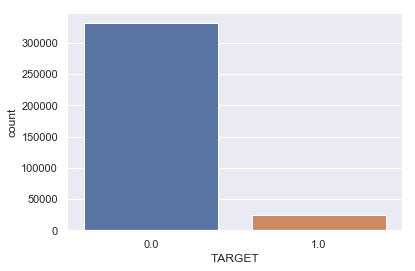

In [14]:
sns.countplot(data_removed['TARGET'], label='Sum')
plt.show()

# Handle data types

In [15]:
data_removed['CNT_CHILDREN'] = data_removed['CNT_CHILDREN'].astype('int64')
data_removed['DAYS_ID_PUBLISH'] = data_removed['DAYS_ID_PUBLISH'].astype('int64')
data_removed['DAYS_EMPLOYED'] = data_removed['DAYS_EMPLOYED'].astype('int64')
data_removed['DAYS_BIRTH'] = data_removed['DAYS_BIRTH'].astype('int64')
data_removed['DAYS_REGISTRATION'] = data_removed['DAYS_REGISTRATION'].astype('int64')
data_removed['DAYS_LAST_PHONE_CHANGE'] = data_removed['DAYS_LAST_PHONE_CHANGE'].astype('int64')

In [16]:
data_removed['DAYS_ID_PUBLISH'] = abs(data_removed['DAYS_ID_PUBLISH'].values)
data_removed['DAYS_EMPLOYED'] = abs(data_removed['DAYS_EMPLOYED'].values)
data_removed['DAYS_BIRTH'] = abs(data_removed['DAYS_BIRTH'].values)
data_removed['DAYS_REGISTRATION'] = abs(data_removed['DAYS_REGISTRATION'].values)
data_removed['DAYS_LAST_PHONE_CHANGE'] = abs(data_removed['DAYS_LAST_PHONE_CHANGE'].values)

In [17]:
data_fillna['DAYS_ID_PUBLISH'] = abs(data_fillna['DAYS_ID_PUBLISH'].values)
data_fillna['DAYS_EMPLOYED'] = abs(data_fillna['DAYS_EMPLOYED'].values)
data_fillna['DAYS_BIRTH'] = abs(data_fillna['DAYS_BIRTH'].values)
data_fillna['DAYS_REGISTRATION'] = abs(data_fillna['DAYS_REGISTRATION'].values)
data_fillna['DAYS_LAST_PHONE_CHANGE'] = abs(data_fillna['DAYS_LAST_PHONE_CHANGE'].values)

# Create Polynominal features

In [373]:
# from sklearn.preprocessing import PolynomialFeatures

# poly_features = data_fillna[['REGION_RATING_CLIENT_W_CITY']]
# # Create the polynomial object with specified degree
# poly_transformer = PolynomialFeatures(degree = 10)

# # Train the polynomial features
# poly_transformer.fit(poly_features)

# # Transform the features
# poly_features = poly_transformer.transform(poly_features)
# print('Polynomial Features shape: ', poly_features.shape)

# poly_features[:, 10]

In [322]:
# REGION_RATING_CLIENT_W_CITY_10 = poly_features[:, 10]

In [323]:
# data_fillna['REGION_RATING_CLIENT_W_CITY_10'] = REGION_RATING_CLIENT_W_CITY_10
# data_removed['REGION_RATING_CLIENT_W_CITY_10'] = REGION_RATING_CLIENT_W_CITY_10

In [374]:
# del data_fillna['days_birth_10']
# del data_removed['days_birth_10']
# data_fillna.columns

# Make correlation analysis

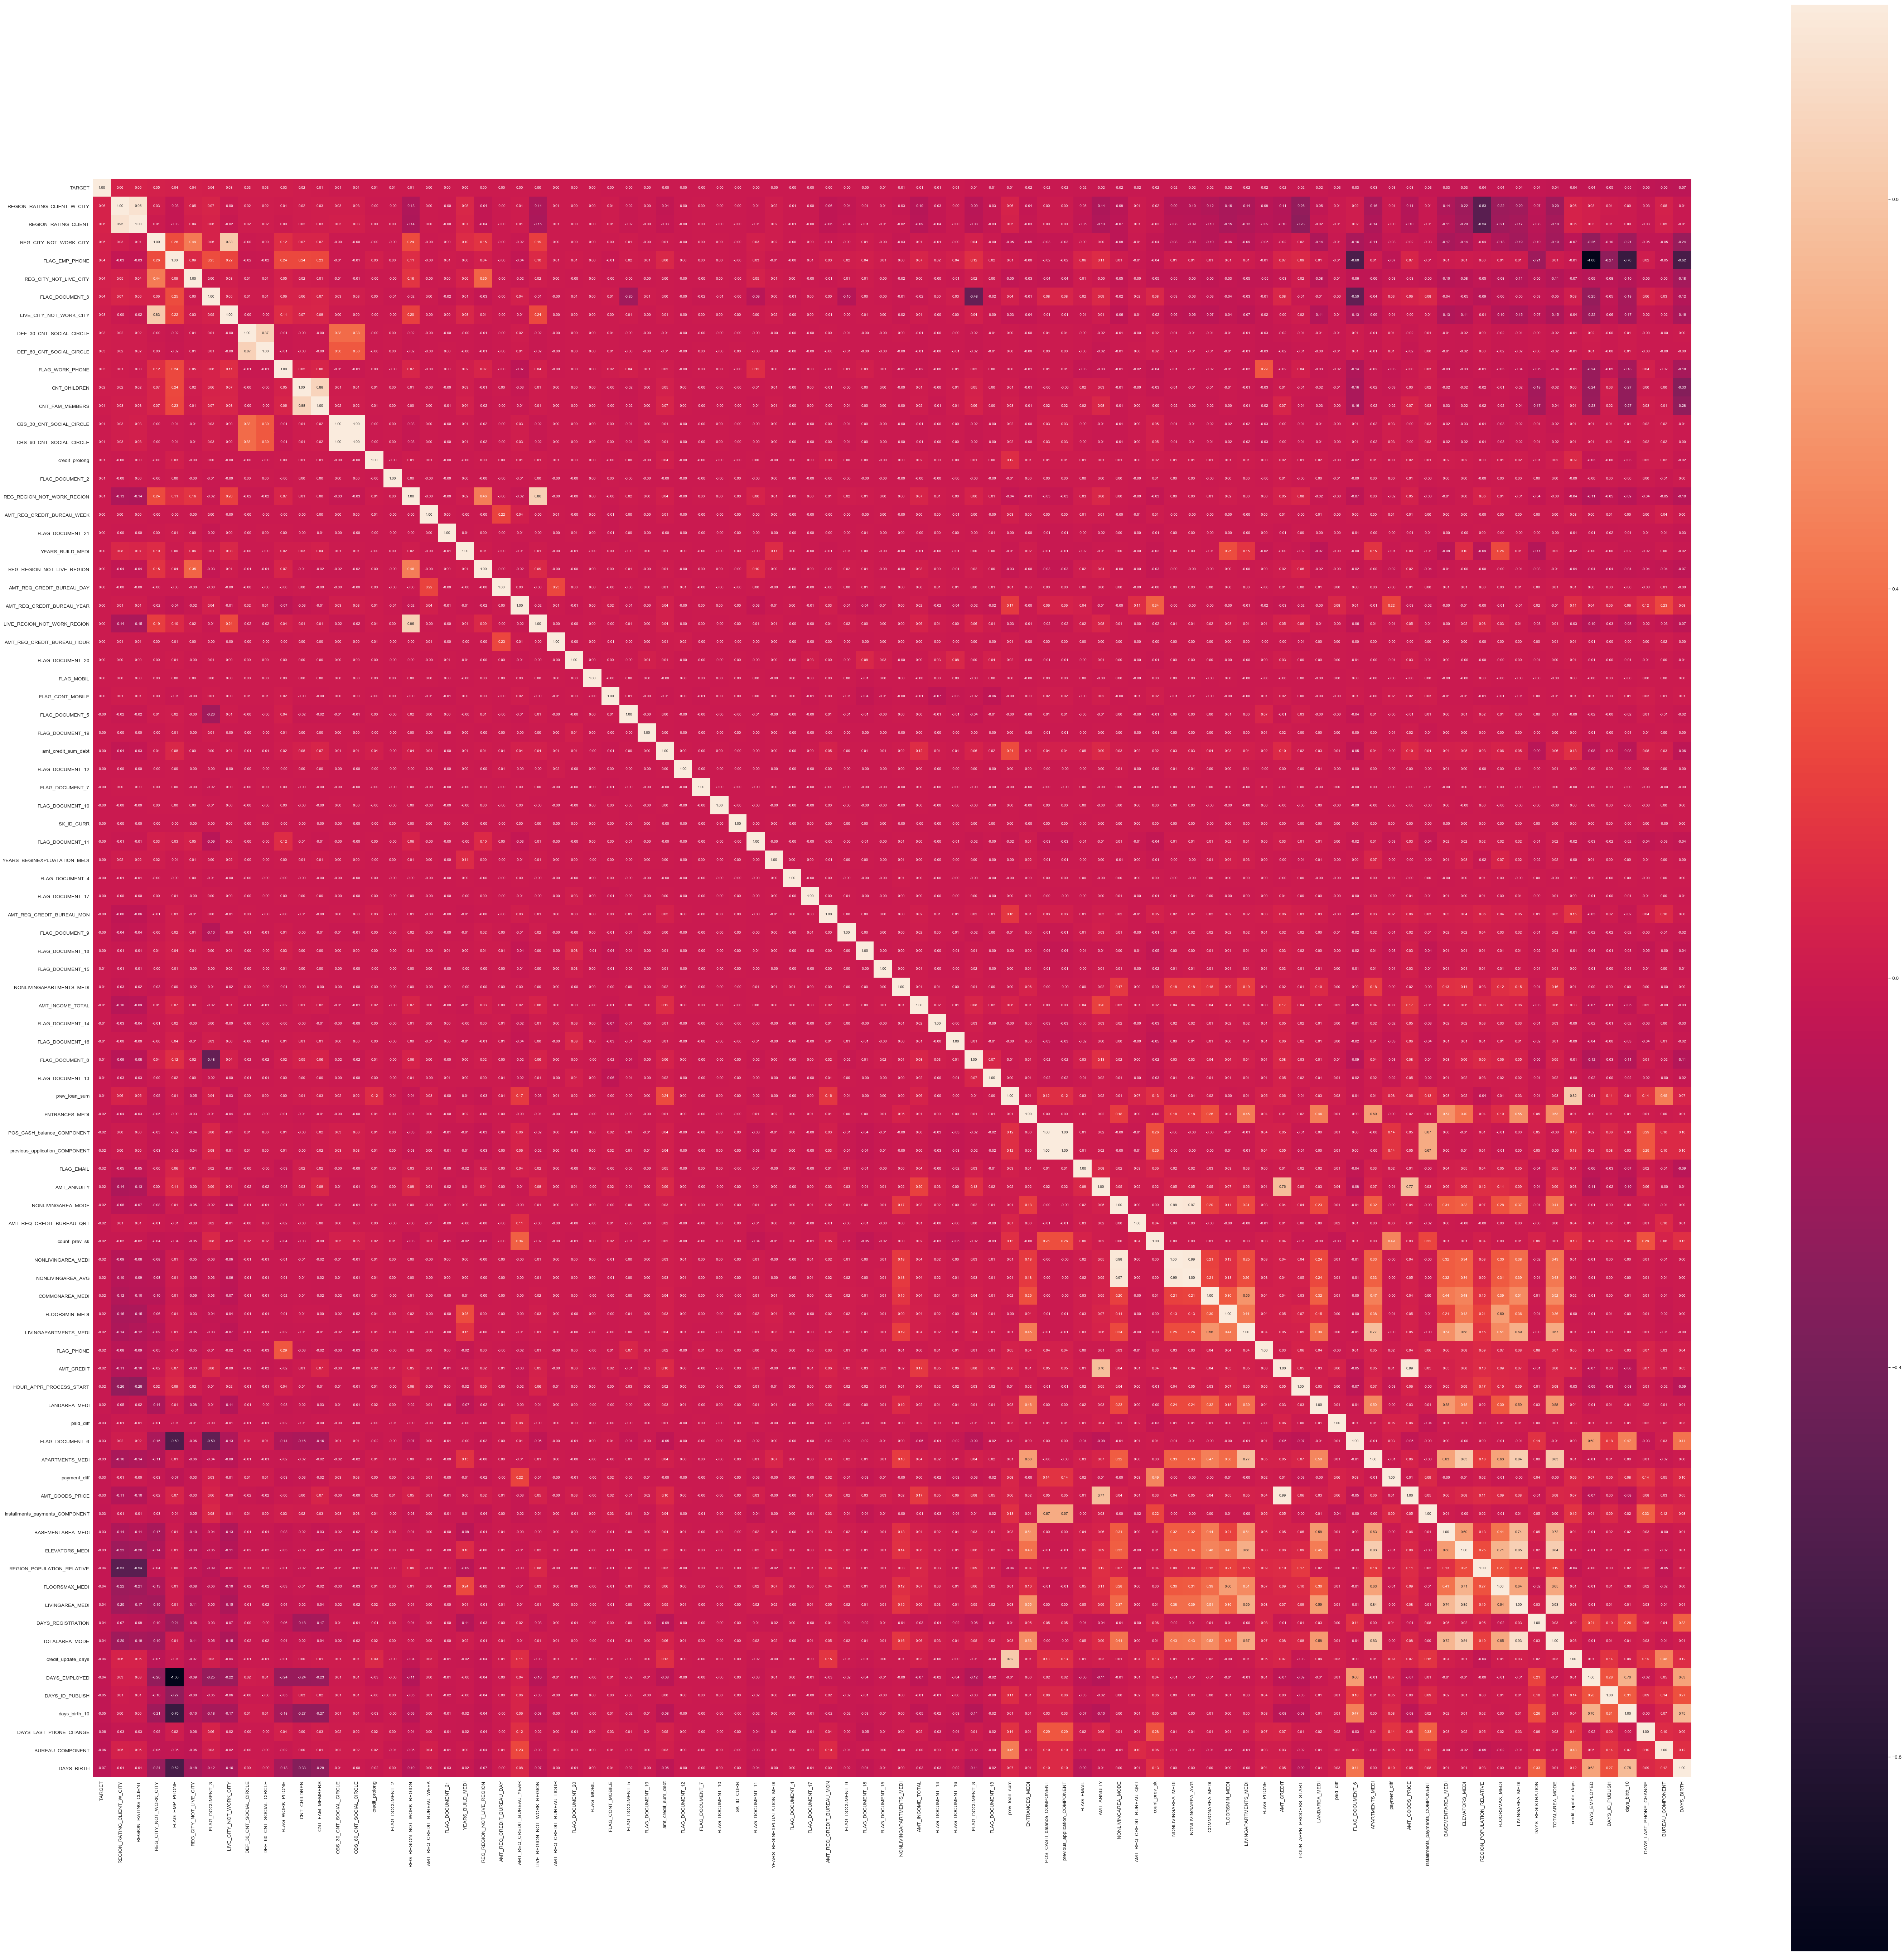

In [271]:
corrmat = data_fillna.corr()
k = 50
cols = corrmat.nlargest(k, 'TARGET')['TARGET'].index
cm = np.corrcoef(data_fillna[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(100, 100))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values,xticklabels=cols.values)
plt.show()

In [20]:
data_fillna.to_csv('data/pre_preprocessed_data/data_massive_fillna.csv', index=False)

In [5]:
data_fillna = pd.read_csv('data/pre_preprocessed_data/data_massive_fillna.csv')

In [6]:
data_fillna.shape

(356255, 532)

# Split Dataset on train, test and test_main

### Split removed

In [18]:
removed_data = data_removed[:307511]
test_main_r = data_removed[307511:]

data_removed_train = removed_data.copy()
data_removed_test = data_removed_train.sample(frac=0.3)
print(data_removed_test.shape)

test_id = data_removed_test.index.values
train_id = data_removed_train.index.values

ids = np.setdiff1d(train_id, test_id)

data_removed_train = data_removed_train.iloc[ids]
data_removed_train.shape

(92253, 513)


(215258, 513)

### Split fillna

In [18]:
fillna_data = data_fillna[:307511]
test_main_f = data_fillna[307511:]

data_fillna_train = fillna_data.copy()
data_fillna_test = data_fillna_train.sample(frac=0.3)
print(data_fillna_test.shape)

test_id = data_fillna_test.index.values
train_id = data_fillna_train.index.values

ids = np.setdiff1d(train_id, test_id)

data_fillna_train = data_fillna_train.iloc[ids]
data_fillna_train.shape

(92253, 532)


(215258, 532)

# Splitting dataset on targets and features

In [31]:
r_train_y = data_removed_train['TARGET']
r_train_x = data_removed_train.copy()
del r_train_x['TARGET']
del r_train_x['SK_ID_CURR']

r_test_y = data_removed_test['TARGET']
r_test_x = data_removed_test.copy()
del r_test_x['TARGET']
del r_test_x['SK_ID_CURR']
del test_main_r['TARGET']
del test_main_r['SK_ID_CURR']

In [19]:
f_train_y = data_fillna_train['TARGET']
f_train_x = data_fillna_train.copy()
del f_train_x['TARGET']
del f_train_x['SK_ID_CURR']

f_test_y = data_fillna_test['TARGET']
f_test_x = data_fillna_test.copy()
del f_test_x['TARGET']
del f_test_x['SK_ID_CURR']
del test_main_f['TARGET']
del test_main_f['SK_ID_CURR']

# Get dummies

### Removed

In [33]:
x_removed = pd.concat([r_train_x, r_test_x]).reset_index(drop=True)
print(x_removed.shape)

x_removed_and_test = pd.concat([x_removed, test_main_r]).reset_index(drop=True)
print(x_removed_and_test.shape)

x_removed_dum = pd.get_dummies(x_removed_and_test)
print(x_removed_dum.shape)

train_x_r = x_removed_dum[:215258]
test_x_r = x_removed_dum[215258:307511]
r_test_main = x_removed_dum[307511:]

print(train_x_r.shape, test_x_r.shape, r_test_main.shape)

(307511, 511)
(356255, 512)
(356255, 607)
(215258, 607) (92253, 607) (48744, 607)


### Fillna

In [21]:
x_fillna = pd.concat([f_train_x, f_test_x]).reset_index(drop=True)
print(x_fillna.shape)

x_fillna_and_test = pd.concat([x_fillna, test_main_f]).reset_index(drop=True)
print(x_fillna_and_test.shape)

x_fillna_dum = pd.get_dummies(x_fillna_and_test)
print(x_fillna_dum.shape)

train_x_f = x_fillna_dum[:215258]
test_x_f = x_fillna_dum[215258:307511]
f_test_main = x_fillna_dum[307511:]

print(train_x_f.shape, test_x_f.shape, f_test_main.shape)

(307511, 530)
(356255, 530)
(356255, 648)
(215258, 648) (92253, 648) (48744, 648)


# Handle outliers

### For data_removed

In [38]:
train_x_r['TARGET'] = r_train_y.values

cols = train_x_r.columns
num_cols = train_x_r._get_numeric_data().columns
print(num_cols)
num_train = train_x_r.select_dtypes(include=["number"])
cat_train = train_x_r.select_dtypes(exclude=["number"])
num_train.shape

Q1 = num_train.quantile(0.005)
Q3 = num_train.quantile(0.995)
IQR = Q3 - Q1
idx = ~((num_train < (Q1 - 1.5 * IQR)) | (num_train > (Q3 + 1.5 * IQR))).any(axis=1)
train_x_r = pd.concat([num_train.loc[idx], cat_train.loc[idx]], axis=1)

r_train_y = train_x_r['TARGET']
del train_x_r['TARGET']

train_x_r.shape

Index(['AMT_ANNUITY', 'AMT_ANNUITY_x', 'AMT_ANNUITY_x.1', 'AMT_ANNUITY_x.2',
       'AMT_ANNUITY_x.3', 'AMT_ANNUITY_y', 'AMT_ANNUITY_y.1',
       'AMT_ANNUITY_y.2', 'AMT_ANNUITY_y.3', 'AMT_APPLICATION_x',
       ...
       'ORGANIZATION_TYPE_University', 'ORGANIZATION_TYPE_XNA',
       'WEEKDAY_APPR_PROCESS_START_FRIDAY',
       'WEEKDAY_APPR_PROCESS_START_MONDAY',
       'WEEKDAY_APPR_PROCESS_START_SATURDAY',
       'WEEKDAY_APPR_PROCESS_START_SUNDAY',
       'WEEKDAY_APPR_PROCESS_START_THURSDAY',
       'WEEKDAY_APPR_PROCESS_START_TUESDAY',
       'WEEKDAY_APPR_PROCESS_START_WEDNESDAY', 'TARGET'],
      dtype='object', length=608)


(175134, 607)

### For data_fillna

In [22]:
train_x_f['TARGET'] = f_train_y.values

cols = train_x_f.columns
num_cols = train_x_f._get_numeric_data().columns
print(num_cols)
num_train = train_x_f.select_dtypes(include=["number"])
cat_train = train_x_f.select_dtypes(exclude=["number"])
num_train.shape
Q1 = num_train.quantile(0.005)
Q3 = num_train.quantile(0.995)
IQR = Q3 - Q1
idx = ~((num_train < (Q1 - 1.5 * IQR)) | (num_train > (Q3 + 1.5 * IQR))).any(axis=1)
train_x_f = pd.concat([num_train.loc[idx], cat_train.loc[idx]], axis=1)

f_train_y = train_x_f['TARGET']
del train_x_f['TARGET']

train_x_f.shape

Index(['AMT_ANNUITY_x', 'AMT_ANNUITY_x.1', 'AMT_CREDIT_x', 'AMT_GOODS_PRICE_x',
       'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       ...
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'WEEKDAY_APPR_PROCESS_START_FRIDAY',
       'WEEKDAY_APPR_PROCESS_START_MONDAY',
       'WEEKDAY_APPR_PROCESS_START_SATURDAY',
       'WEEKDAY_APPR_PROCESS_START_SUNDAY',
       'WEEKDAY_APPR_PROCESS_START_THURSDAY',
       'WEEKDAY_APPR_PROCESS_START_TUESDAY',
       'WEEKDAY_APPR_PROCESS_START_WEDNESDAY', 'TARGET'],
      dtype='object', length=649)


(171150, 648)

# Normalization

### Removed

In [44]:
scaler = MinMaxScaler()
scaler.fit(train_x_r)

x_train = scaler.transform(train_x_r)
x_test = scaler.transform(test_x_r)
x_main_test = scaler.transform(r_test_main)

y_train = r_train_y.copy()
y_test = r_test_y.copy()

### Fillna

In [23]:
scaler = MinMaxScaler()
scaler.fit(train_x_f)

x_train = scaler.transform(train_x_f)
x_test = scaler.transform(test_x_f)
x_main_test = scaler.transform(f_test_main)

y_train = f_train_y.copy()
y_test = f_test_y.copy()

# Handle imbalance data

### Oversampling

In [366]:
# from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SMOTENC
# from collections import Counter

# x_resampled, y_resampled = BorderlineSMOTE().fit_resample(x_train, y_train)
# print(sorted(Counter(y_resampled).items()))

# smote_nc = SMOTENC(categorical_features=[0, 2], random_state=0)
# x_resampled, y_resampled = smote_nc.fit_resample(x_train, y_train)
# print(sorted(Counter(y_resampled).items()))

# x_resampled, y_resampled = SMOTE().fit_resample(x_train, y_train)
# print(sorted(Counter(y_resampled).items()))

# x_resampled, y_resampled = ADASYN().fit_resample(x_train, y_train)
# print(sorted(Counter(y_resampled).items()))

# Handle nan vals

In [24]:
x_train = np.nan_to_num(x_train)
x_test =  np.nan_to_num(x_test)
x_main_test = np.nan_to_num(x_main_test)

# Test datasets on example

In [2]:
x_train = pd.read_csv('data/data_for_model/x_train_not_balanced.csv')
y_train = pd.read_csv('data/data_for_model/y_train_not_balanced.csv')

x_test = pd.read_csv('data/data_for_model/x_test.csv')
y_test = pd.read_csv('data/data_for_model/y_test.csv')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score,  roc_curve, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# lr = LogisticRegression(GradientBoostingClassifier(), n_estimators=5)
lr = GridSearchCV(LogisticRegression(), hyperparameters, cv=5, verbose=0)
best_model = lr.fit(x_train, y_train)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C']) 


# lr.fit(x_train, y_train)
# y_pred = lr.predict(x_test)
# probs = lr.predict_proba(x_test)
# probs = probs[:, 1]
y_pred = best_model.predict(x_test)
probs = best_model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print('Balanced:', balanced_accuracy_score(y_test, y_pred))
print('AUC ROC:', auc)

In [370]:
# Not-full dataset
# Logistic Regression
# Remove dataset: over_sampling; BorderlineSMOTE; Normalized; Balanced - 0.6224869941236959; AUC ROC - 0.6689262866227805 
# Remove dataset: over_sampling; SMOTENC; Normalized; Balanced - 0.5717518993575862; AUC ROC - 0.6385838295405608
# Remove dataset: over_sampling; SMOTE;   Normalized; Balanced - 0.6166696521827759; AUC ROC - 0.6598101528558757

# Entire dataset
# Logistic Regression
# Remove dataset: over_sampling; BorderlineSMOTE; Normalized; Balanced - ...; AUC ROC - 0.67
# Fillna dataset: over_sampling; BorderlineSMOTE; Normalized; Balanced - 0.6215630195718419; AUC ROC -  0.6673514810363779 
# Remove dataset:  Normalized; Balanced - 0.5000795418390073; AUC ROC - 0.6771862974813969
# Fillna dataset:  Normalized; Balanced - 0.5000676194751579; AUC ROC - 0.6764587297733253

# AUC ROC: 0.7343573059464039 | Fillna
# AUC ROC: 0.6775286249421997 without comp
# AUC ROC: 0.6837003042315719 with berue comp
# AUC ROC: 0.6843670107869264 with berue and installment comp
# AUC ROC: 0.6955306952870857 with berue, installment comps, particular features

# Remove dataset: Component; with corr del; Normalized; Balanced - v; AUC ROC -  0.6708015381254901
# Remove dataset: Component; without corr del; Normalized; Balanced - v; AUC ROC - 0.6805247621526884
# Remove dataset: SMOTE; Component; without corr del; Normalized; Balanced - v; AUC ROC - 0.6726899329907432

# Select and Save Entire dataset + Removed

In [25]:
# x_balanced_df = pd.DataFrame(data=x_resampled, columns=x_removed_dum.columns)
# y_balanced_df = pd.DataFrame(data=y_resampled, columns=['TARGET'])

x_test_df = pd.DataFrame(data=x_test, columns=test_x_f.columns)
y_test_df = pd.DataFrame(data=y_test, columns=['TARGET'])

x_not_balanced_df = pd.DataFrame(data=x_train, columns=train_x_f.columns)
y_not_balanced_df = pd.DataFrame(data=y_train, columns=['TARGET'])

x_main_test_df = pd.DataFrame(data=x_main_test, columns=f_test_main.columns)

In [26]:
# x_balanced_df.to_csv('data/data_for_model/x_train_balanced.csv', index=False)
# y_balanced_df.to_csv('data/data_for_model/y_train_balanced.csv', index=False)

x_test_df.to_csv('data/data_for_model/x_test.csv', index=False)
y_test_df.to_csv('data/data_for_model/y_test.csv', index=False)

x_not_balanced_df.to_csv('data/data_for_model/x_train_not_balanced.csv', index=False)
y_not_balanced_df.to_csv('data/data_for_model/y_train_not_balanced.csv', index=False)

x_main_test_df.to_csv('data/data_for_model/x_main_test.csv', index=False)